<a href="https://colab.research.google.com/github/CaiqueBorges/MC_alunos_ufrn/blob/main/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering #Hierarchical
from sklearn.mixture import GaussianMixture #EM
from sklearn.metrics import silhouette_samples, silhouette_score

# LEITURA DO DATASET

In [6]:
url = 'https://raw.githubusercontent.com/CaiqueBorges/MC_alunos_ufrn/main/input/discentes-2019.csv'
dados = pd.read_csv(url, encoding='utf-8', on_bad_lines='skip', sep=';')
dataset = dados.copy()
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16020 entries, 0 to 16019
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   matricula             16020 non-null  int64  
 1   nome_discente         16020 non-null  object 
 2   sexo                  16020 non-null  object 
 3   ano_ingresso          16020 non-null  int64  
 4   periodo_ingresso      15976 non-null  float64
 5   forma_ingresso        16019 non-null  object 
 6   tipo_discente         16020 non-null  object 
 7   status                16020 non-null  object 
 8   sigla_nivel_ensino    16020 non-null  object 
 9   nivel_ensino          16020 non-null  object 
 10  id_curso              14616 non-null  float64
 11  nome_curso            14616 non-null  object 
 12  modalidade_educacao   14616 non-null  object 
 13  id_unidade            14616 non-null  float64
 14  nome_unidade          14616 non-null  object 
 15  id_unidade_gestora 

# AGRUPAMENTO - CLUSTERING

In [ ]:
#
dados.drop(columns=['matricula', 'nome_discente', 'id_curso', 'id_unidade',
                    'id_unidade_gestora', 'sigla_nivel_ensino', 'nome_unidade_gestora',
                    'nome_curso', 'nome_unidade', 'periodo_ingresso', 'tipo_discente',
                    'forma_ingresso', 'sexo', 'ano_ingresso'], inplace=True)
# dados[['sexo']] = dados[['sexo']].fillna(0).astype(bool)
# dados[['ano_ingresso']] = dados[['ano_ingresso']].fillna(0).astype(int)
dados = dados[dados!=0].dropna()
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14617 entries, 0 to 16020
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   status               14617 non-null  object
 1   nivel_ensino         14617 non-null  object
 2   modalidade_educacao  14617 non-null  object
dtypes: object(3)
memory usage: 456.8+ KB


In [ ]:
# Criando lista com colunas numéricas
tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
num_cols = dados.select_dtypes(include=tipos_numericos)
num_cols = list(num_cols.columns)

# Normalizando colunas numéricas
dados[num_cols] = dados[num_cols].apply(minmax_scale)
dados.head()

,status,nivel_ensino,modalidade_educacao
0,CANCELADO,TÉCNICO,SEMI-PRESENCIAL
1,ATIVO,GRADUAÇÃO,PRESENCIAL
2,CANCELADO,GRADUAÇÃO,PRESENCIAL
3,ATIVO,FORMAÇÃO COMPLEMENTAR,PRESENCIAL
4,TRANCADO,GRADUAÇÃO,PRESENCIAL


In [ ]:
# Obtendo os nomes das colunas Categóricas
tipos_categoricos = ['object']
cat_cols = dados.select_dtypes(include=tipos_categoricos)

# Binarizando os atributos categóricos
categoricoToBinary = pd.get_dummies(cat_cols)
dados = dados.join(categoricoToBinary)

# Removendo os atributos categóricos originais
dados.drop(cat_cols.columns.to_list(), axis=1, inplace=True)

dados.head()

,status_ATIVO,status_ATIVO - FORMANDO,status_CADASTRADO,status_CANCELADO,status_CONCLUÍDO,status_DEFENDIDO,status_EM HOMOLOGAÇÃO,status_FORMADO,status_TRANCADO,nivel_ensino_DOUTORADO,...,nivel_ensino_FUNDAMENTAL,nivel_ensino_GRADUAÇÃO,nivel_ensino_LATO SENSU,nivel_ensino_MESTRADO,nivel_ensino_RESIDÊNCIA,nivel_ensino_TÉCNICO,nivel_ensino_TÉCNICO INTEGRADO,modalidade_educacao_A DISTÂNCIA,modalidade_educacao_PRESENCIAL,modalidade_educacao_SEMI-PRESENCIAL
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14617 entries, 0 to 16020
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   status_ATIVO                         14617 non-null  uint8
 1   status_ATIVO - FORMANDO              14617 non-null  uint8
 2   status_CADASTRADO                    14617 non-null  uint8
 3   status_CANCELADO                     14617 non-null  uint8
 4   status_CONCLUÍDO                     14617 non-null  uint8
 5   status_DEFENDIDO                     14617 non-null  uint8
 6   status_EM HOMOLOGAÇÃO                14617 non-null  uint8
 7   status_FORMADO                       14617 non-null  uint8
 8   status_TRANCADO                      14617 non-null  uint8
 9   nivel_ensino_DOUTORADO               14617 non-null  uint8
 10  nivel_ensino_FORMAÇÃO COMPLEMENTAR   14617 non-null  uint8
 11  nivel_ensino_FUNDAMENTAL             14617 non-null  u

In [ ]:
# Salvando dados transformados
df = pd.DataFrame(dados)
df.to_csv('/content/discentes-2019-tratado.csv', index=False)

In [ ]:
# Criando listas para salvar os índices DB
db_hiera_avLink = []
db_Kmeans = []
db_em = []

# DB Hieráquico Average
for i in list(range(2, 21)):
    cluster = AgglomerativeClustering(n_clusters=i, linkage='average')
    cluster.fit(dados)
    labels = cluster.fit_predict(dados)
    value = metrics.davies_bouldin_score(dados, labels)
    db_hiera_avLink.append(value)
    print("DB_Hiera_average  (k = %d): %0.3f" % (i, value))

DB_Hiera_average  (k = 2): 1.433
DB_Hiera_average  (k = 3): 0.864
DB_Hiera_average  (k = 4): 1.064
DB_Hiera_average  (k = 5): 1.075
DB_Hiera_average  (k = 6): 0.986
DB_Hiera_average  (k = 7): 1.024
DB_Hiera_average  (k = 8): 0.880
DB_Hiera_average  (k = 9): 0.867
DB_Hiera_average  (k = 10): 0.876
DB_Hiera_average  (k = 11): 0.819
DB_Hiera_average  (k = 12): 0.811
DB_Hiera_average  (k = 13): 0.867
DB_Hiera_average  (k = 14): 0.868
DB_Hiera_average  (k = 15): 0.820
DB_Hiera_average  (k = 16): 0.812
DB_Hiera_average  (k = 17): 0.762
DB_Hiera_average  (k = 18): 0.803
DB_Hiera_average  (k = 19): 0.809
DB_Hiera_average  (k = 20): 0.815


In [ ]:
# DB K-means
for i in list(range(2, 21)):
    km = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=37)
    km.fit(dados)
    labels = km.fit_predict(dados)
    value = metrics.davies_bouldin_score(dados, labels)
    db_Kmeans.append(value)
    print("DB_K-means_s37 (k = %d): %0.3f" % (i, value))

DB_K-means_s37 (k = 2): 1.613
DB_K-means_s37 (k = 3): 1.240
DB_K-means_s37 (k = 4): 1.088
DB_K-means_s37 (k = 5): 1.083
DB_K-means_s37 (k = 6): 1.080
DB_K-means_s37 (k = 7): 1.032
DB_K-means_s37 (k = 8): 0.978
DB_K-means_s37 (k = 9): 0.959
DB_K-means_s37 (k = 10): 0.932
DB_K-means_s37 (k = 11): 0.910
DB_K-means_s37 (k = 12): 0.824
DB_K-means_s37 (k = 13): 0.784
DB_K-means_s37 (k = 14): 0.764
DB_K-means_s37 (k = 15): 0.779
DB_K-means_s37 (k = 16): 0.727
DB_K-means_s37 (k = 17): 0.750
DB_K-means_s37 (k = 18): 0.703
DB_K-means_s37 (k = 19): 0.637
DB_K-means_s37 (k = 20): 0.590


In [ ]:
# DB EM
for i in list(range(2, 21)):
    gmm = GaussianMixture(n_components = i, covariance_type='full', init_params='kmeans')
    gmm.fit(dados)
    labels = gmm.fit_predict(dados)
    value = metrics.davies_bouldin_score(dados, labels)
    db_em.append(value)
    print("DB_EM (k = %d): %0.3f" % (i, value))

DB_EM (k = 2): 1.598
DB_EM (k = 3): 1.307
DB_EM (k = 4): 2.060
DB_EM (k = 5): 1.179
DB_EM (k = 6): 1.226
DB_EM (k = 7): 1.007
DB_EM (k = 8): 0.964
DB_EM (k = 9): 1.018
DB_EM (k = 10): 0.860
DB_EM (k = 11): 0.875
DB_EM (k = 12): 0.928
DB_EM (k = 13): 0.765
DB_EM (k = 14): 0.805
DB_EM (k = 15): 0.700
DB_EM (k = 16): 0.712
DB_EM (k = 17): 0.853
DB_EM (k = 18): 0.672
DB_EM (k = 19): 0.779
DB_EM (k = 20): 0.720


In [ ]:
# Calculando média dos índices
print("Média Hierárquico Average: %0.4f" % (np.mean(db_hiera_avLink)))
print("Média K-means: %0.4f" % (np.mean(db_Kmeans)))
print("Média EM: %0.4f" % (np.mean(db_em)))

Média Hierárquico Average: 0.9083
Média K-means: 0.9197
Média EM: 1.0015


Text(0, 0.5, 'index')

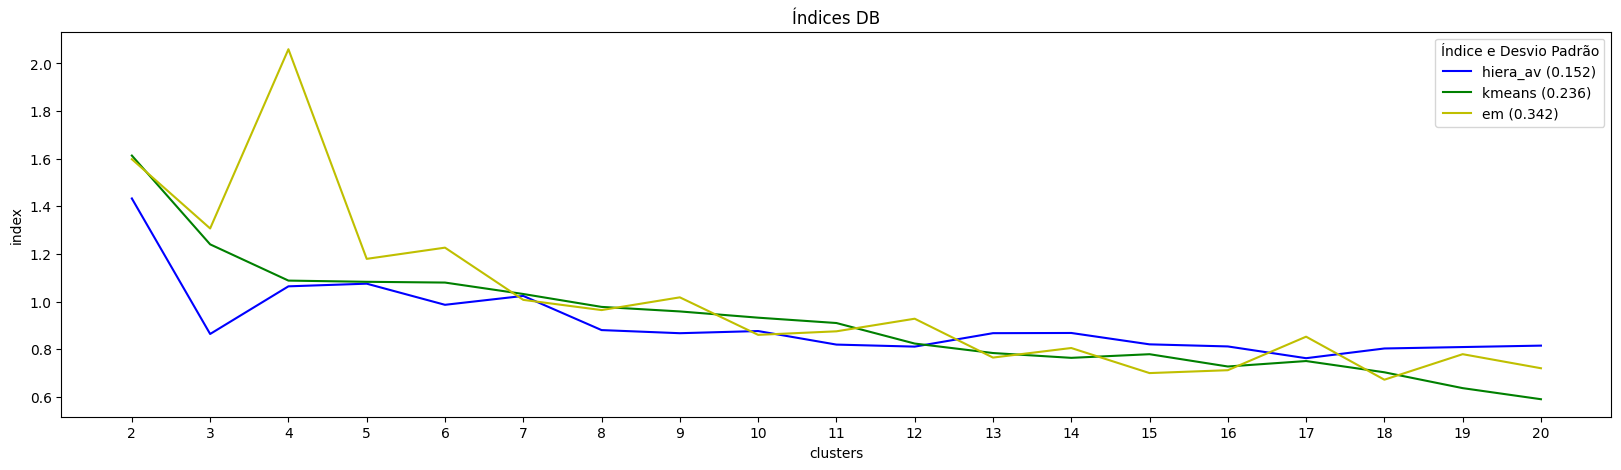

In [ ]:
# Plotar gráfico
x = list(range(2, 21))
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(x, db_hiera_avLink, 'b-', label='hiera_av (%.3f)' % np.std(db_hiera_avLink))
plt.plot(x, db_Kmeans, 'g-', label='kmeans (%.3f)' % np.std(db_Kmeans))
plt.plot(x, db_em, 'y-', label='em (%.3f)' % np.std(db_em))
plt.xticks(range(2,21))
plt.title("Índices DB")
plt.legend()
plt.legend(title="Índice e Desvio Padrão")
plt.xlabel("clusters")
plt.ylabel("index")

In [ ]:
# Criando listas para salvar os índices Silhouette
si_hiera_avLink = []
si_Kmeans = []
si_em = []

# Si Hierarquico Average
for i in list(range(2, 21)):
    ha = AgglomerativeClustering(n_clusters=i, linkage='average')
    ha.fit(dados)
    labels = cluster.fit_predict(dados)
    value = silhouette_score(dados, ha.labels_)
    si_hiera_avLink.append(value)
    print('Silhouette_Hiera_average %dk - %.3f' % (i, value))

Silhouette_Hiera_average 2k - 0.379
Silhouette_Hiera_average 3k - 0.381
Silhouette_Hiera_average 4k - 0.404
Silhouette_Hiera_average 5k - 0.378
Silhouette_Hiera_average 6k - 0.365
Silhouette_Hiera_average 7k - 0.353
Silhouette_Hiera_average 8k - 0.518
Silhouette_Hiera_average 9k - 0.520
Silhouette_Hiera_average 10k - 0.573
Silhouette_Hiera_average 11k - 0.596
Silhouette_Hiera_average 12k - 0.602
Silhouette_Hiera_average 13k - 0.618
Silhouette_Hiera_average 14k - 0.665
Silhouette_Hiera_average 15k - 0.673
Silhouette_Hiera_average 16k - 0.726
Silhouette_Hiera_average 17k - 0.757
Silhouette_Hiera_average 18k - 0.777
Silhouette_Hiera_average 19k - 0.786
Silhouette_Hiera_average 20k - 0.786


In [ ]:
# Si K-means
for i in list(range(2, 21)):
  km = KMeans(n_clusters=i, init='k-means++', n_init=300, max_iter=10, random_state=37)
  km.fit_predict(dados)
  value = silhouette_score(dados, km.labels_)
  si_Kmeans.append(value)
  print('Silhouette_k-Means_s37 %dk - %.3f' % (i, value))

Silhouette_k-Means_s37 2k - 0.372
Silhouette_k-Means_s37 3k - 0.472
Silhouette_k-Means_s37 4k - 0.507
Silhouette_k-Means_s37 5k - 0.556
Silhouette_k-Means_s37 6k - 0.586
Silhouette_k-Means_s37 7k - 0.644
Silhouette_k-Means_s37 8k - 0.673
Silhouette_k-Means_s37 9k - 0.716
Silhouette_k-Means_s37 10k - 0.744
Silhouette_k-Means_s37 11k - 0.772
Silhouette_k-Means_s37 12k - 0.806
Silhouette_k-Means_s37 13k - 0.824
Silhouette_k-Means_s37 14k - 0.842
Silhouette_k-Means_s37 15k - 0.860
Silhouette_k-Means_s37 16k - 0.873
Silhouette_k-Means_s37 17k - 0.888
Silhouette_k-Means_s37 18k - 0.901
Silhouette_k-Means_s37 19k - 0.913
Silhouette_k-Means_s37 20k - 0.921


In [ ]:
# Si EM
for i in list(range(2, 21)):
    gmm = GaussianMixture(n_components=i, covariance_type='full', init_params='kmeans')
    gmm.fit(dados)
    labels = gmm.fit_predict(dados)
    value = silhouette_score(dados, labels)
    si_em.append(value)
    print('Silhouette_EM %dk - %.3f' % (i, value))

Silhouette_EM 2k - 0.359
Silhouette_EM 3k - 0.388
Silhouette_EM 4k - 0.506
Silhouette_EM 5k - 0.529
Silhouette_EM 6k - 0.536
Silhouette_EM 7k - 0.620
Silhouette_EM 8k - 0.664
Silhouette_EM 9k - 0.690
Silhouette_EM 10k - 0.733
Silhouette_EM 11k - 0.693
Silhouette_EM 12k - 0.778
Silhouette_EM 13k - 0.805
Silhouette_EM 14k - 0.827
Silhouette_EM 15k - 0.835
Silhouette_EM 16k - 0.840
Silhouette_EM 17k - 0.860
Silhouette_EM 18k - 0.887
Silhouette_EM 19k - 0.906
Silhouette_EM 20k - 0.909


In [ ]:
# Calculando média dos índices Silhouette
print("Média Hierárquico Average: %0.4f" % (np.mean(si_hiera_avLink)))
print("Média K-means: %0.4f" % (np.mean(si_Kmeans)))
print("Média EM: %0.4f" % (np.mean(si_em)))

Média Hierárquico Average: 0.5716
Média K-means: 0.7301
Média EM: 0.7034


Text(0, 0.5, 'Index Value')

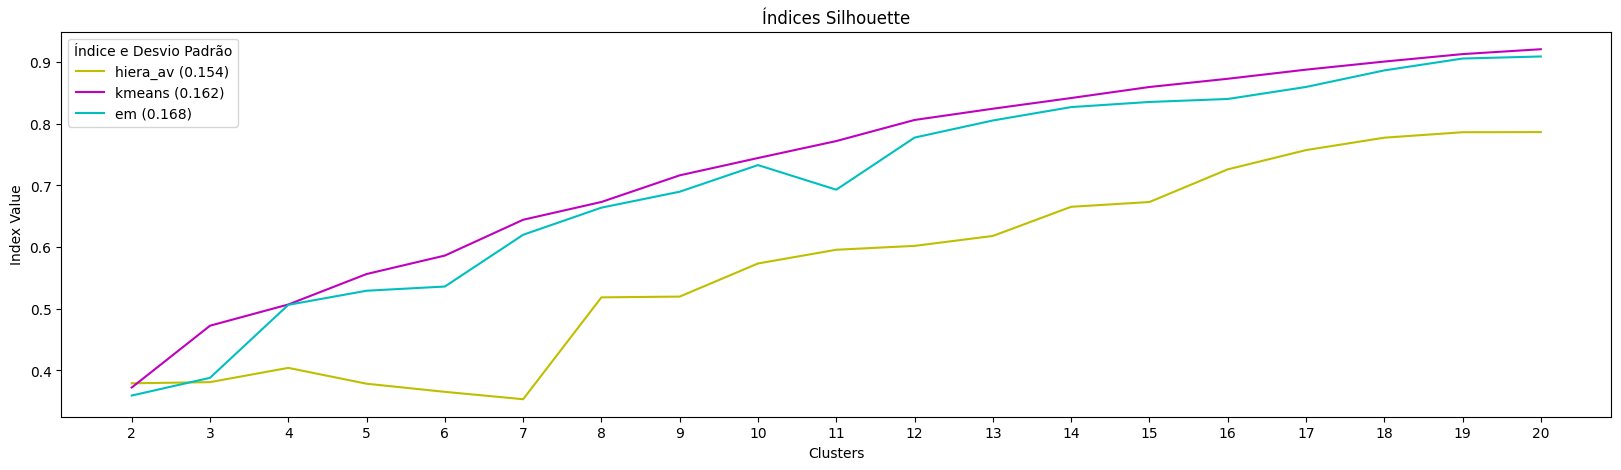

In [ ]:
# Plotar gráfico Silhouette
plt.plot(x, si_hiera_avLink, 'y-', label='hiera_av (%.3f)' % np.std(si_hiera_avLink))
plt.plot(x, si_Kmeans, 'm-', label='kmeans (%.3f)' % np.std(si_Kmeans))
plt.plot(x, si_em, 'c-', label='em (%.3f)' % np.std(si_em))
plt.xticks(range(2,21))
plt.title("Índices Silhouette")
plt.legend(title="Índice e Desvio Padrão")
plt.xlabel("Clusters")
plt.ylabel("Index Value")

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='average')
cluster.fit(dados)
labels = cluster.fit_predict(dados)
print(labels)
print(metrics.davies_bouldin_score(dados, labels))

[2 0 0 ... 0 0 0]
0.8640046220497664


In [ ]:
# juntando os labels com o restante do dataset
dados["cluster"] = cluster.labels_
#dados["Cluster"] = 'cluster' + dados["Cluster"].astype(str)
# Visualização dos novos atributos
dados.head()

,status_ATIVO,status_ATIVO - FORMANDO,status_CADASTRADO,status_CANCELADO,status_CONCLUÍDO,status_DEFENDIDO,status_EM HOMOLOGAÇÃO,status_FORMADO,status_TRANCADO,nivel_ensino_DOUTORADO,...,nivel_ensino_GRADUAÇÃO,nivel_ensino_LATO SENSU,nivel_ensino_MESTRADO,nivel_ensino_RESIDÊNCIA,nivel_ensino_TÉCNICO,nivel_ensino_TÉCNICO INTEGRADO,modalidade_educacao_A DISTÂNCIA,modalidade_educacao_PRESENCIAL,modalidade_educacao_SEMI-PRESENCIAL,cluster
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,2
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
dados_cluster = pd.read_csv('/content/discentes-2019.csv', encoding='utf-8', on_bad_lines='skip', sep=';')
dados_cluster.drop(columns=['matricula', 'nome_discente', 'id_curso', 'id_unidade',
                    'id_unidade_gestora', 'sigla_nivel_ensino', 'nome_unidade_gestora',
                    'nome_curso', 'nome_unidade', 'periodo_ingresso', 'tipo_discente',
                    'forma_ingresso', 'sexo', 'ano_ingresso'], inplace=True)
dados_cluster = dados_cluster[dados_cluster!=0].dropna()
dados_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14617 entries, 0 to 16020
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   status               14617 non-null  object
 1   nivel_ensino         14617 non-null  object
 2   modalidade_educacao  14617 non-null  object
dtypes: object(3)
memory usage: 456.8+ KB


In [ ]:
cluster_column = dados["cluster"]
dados_cluster = pd.concat([dados_cluster, cluster_column], axis = 1)
dados_cluster.head()

,status,nivel_ensino,modalidade_educacao,cluster
0,CANCELADO,TÉCNICO,SEMI-PRESENCIAL,2
1,ATIVO,GRADUAÇÃO,PRESENCIAL,0
2,CANCELADO,GRADUAÇÃO,PRESENCIAL,0
3,ATIVO,FORMAÇÃO COMPLEMENTAR,PRESENCIAL,0
4,TRANCADO,GRADUAÇÃO,PRESENCIAL,0


<Axes: xlabel='modalidade_educacao'>

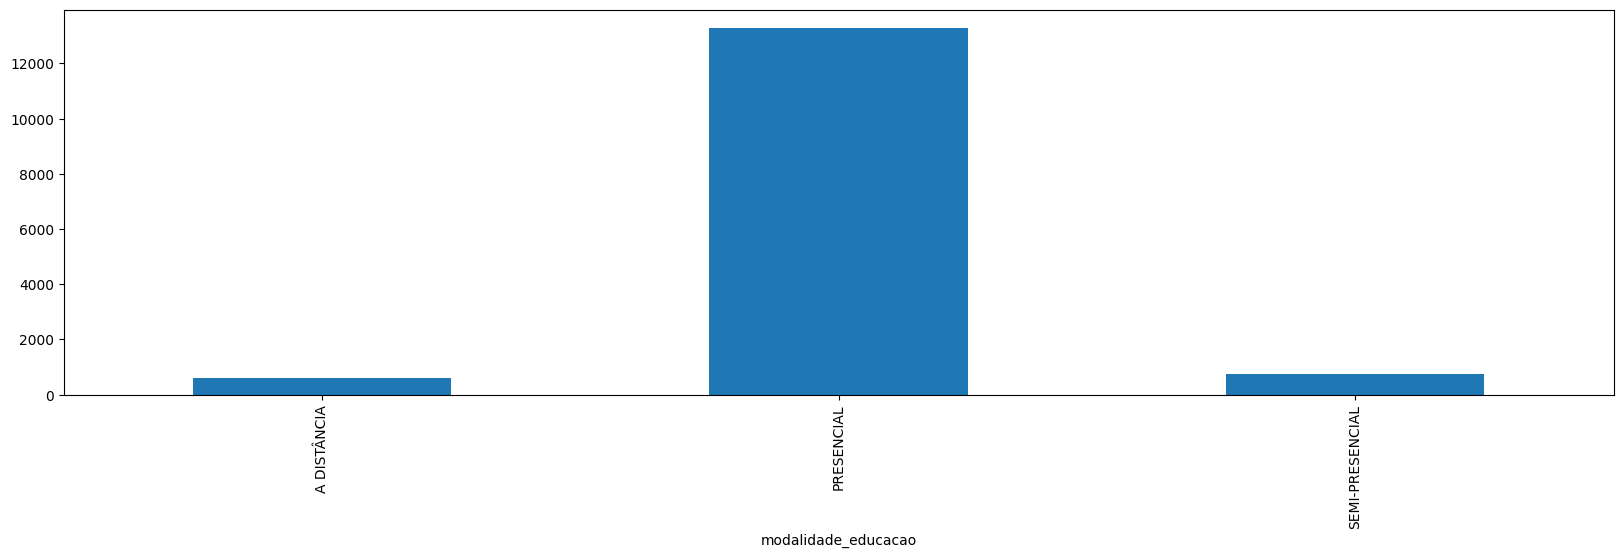

In [ ]:
dados_cluster.groupby('modalidade_educacao').size().plot(kind='bar')

<Axes: xlabel='status'>

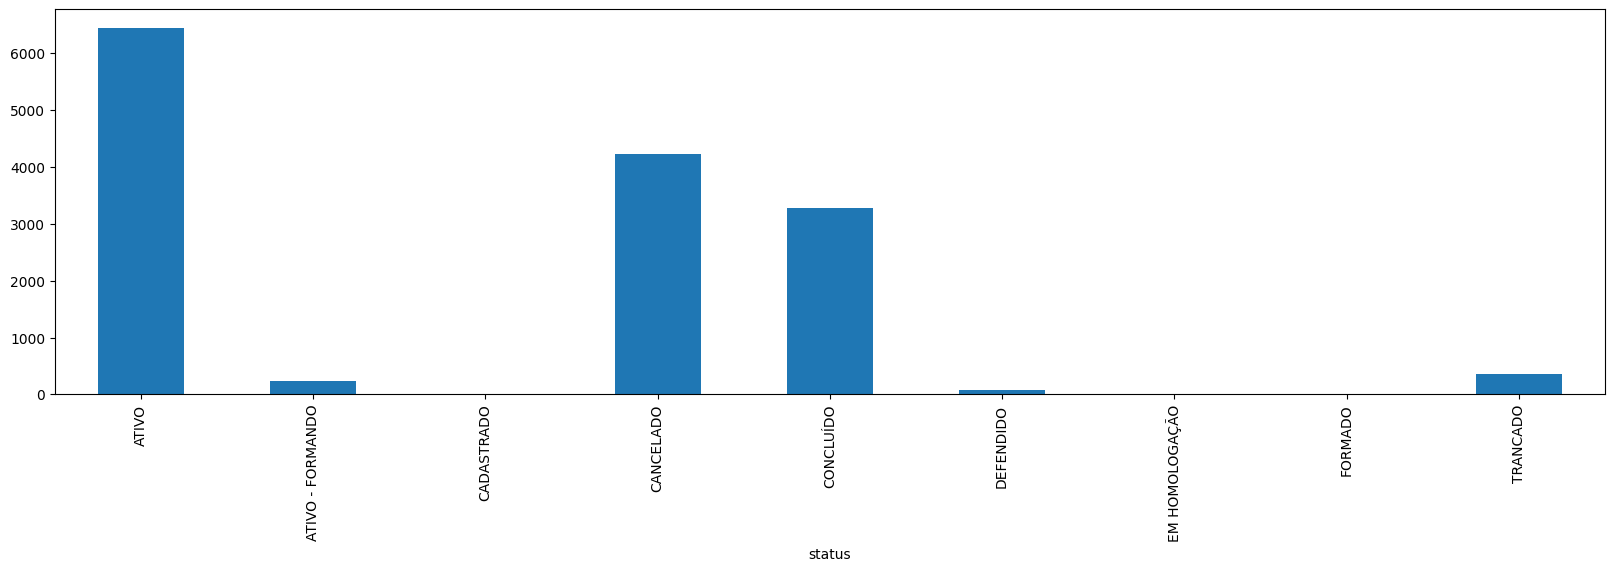

In [ ]:
dados_cluster.groupby('status').size().plot(kind='bar')

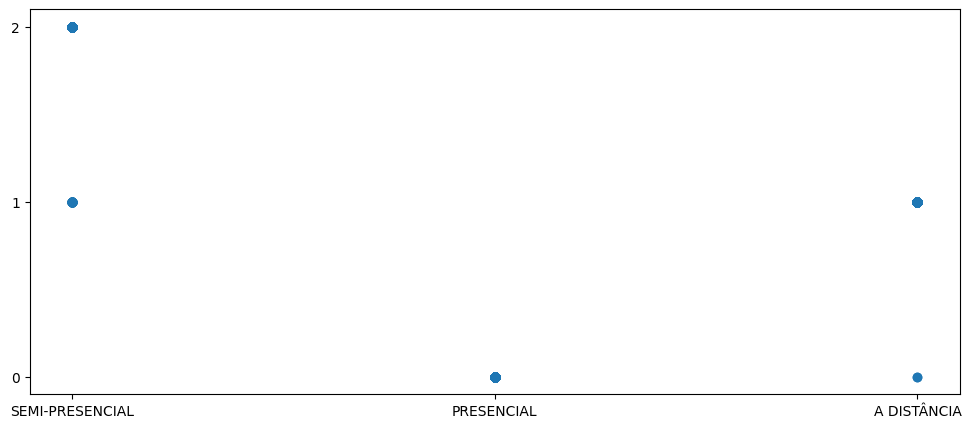

In [ ]:
x = dados_cluster['modalidade_educacao']
y = dados_cluster['cluster']

fig, ax = plt.subplots(figsize=(12,5))
plt.yticks(range(0,3))
ax.scatter(x, y)
fig.show()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(dados_cluster, x=dados_cluster['nivel_ensino'], y=dados_cluster['modalidade_educacao'], color=dados_cluster['cluster'])
fig.show()

In [ ]:
fig = px.scatter(dados_cluster, x=dados_cluster['status'], y=dados_cluster['modalidade_educacao'], color=dados_cluster['cluster'])
fig.show()

In [ ]:
fig = px.scatter(dados_cluster, x=dados_cluster['status'], y=dados_cluster['nivel_ensino'], color=dados_cluster['cluster'])
fig.show()

In [ ]:
fig = px.scatter(dados_cluster, x=dados_cluster['status'], y=dados_cluster['nivel_ensino'], color=dados_cluster['modalidade_educacao'], symbol=dados_cluster['cluster'])
fig.show()

In [ ]:
x = dados_cluster['status']
y = dados_cluster['cluster']

fig, ax = plt.subplots(figsize=(12,5))
plt.yticks(range(0,3))
ax.scatter(x, y)
fig.show()

In [ ]:
# Salvando dados transformados
df = pd.DataFrame(dados_cluster)
df.to_csv('/content/discentes-2019-clusters.csv', index=False)

# CLASSIFICAÇÃO

O alvo será identificar alunos que possuem maior probabilidade de desistência. Para isso, será usado como o atributo Classe o "Status"

Importanto pacotes

In [53]:
import pandas as pd
import numpy as np
# divisão dos dados
from sklearn.model_selection import train_test_split, cross_validate
# análise de resultados
from sklearn.metrics import classification_report, confusion_matrix
# MLPs
from sklearn.neural_network import MLPClassifier
# gdown para baixar os dados
import gdown

In [59]:
dataset

,matricula,nome_discente,sexo,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,20193012209,ABDENOR BEZERRA DOS SANTOS,M,2019,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
1,20190088900,ABDIAS MONTEIRO DE ANDRADE MELO,M,2019,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,111635060.0,HISTÓRIA,PRESENCIAL,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
2,20190127606,ABDIAS SABINO RODRIGUES FILHO,M,2019,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,111635060.0,HISTÓRIA,PRESENCIAL,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
3,20195001008,ABEL GOMES DE OLIVEIRA FILHO,M,2019,1.0,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,112718836.0,CURSO DE LÍNGUA BRASILEIRA DE SINAIS (LIBRAS),PRESENCIAL,6042.0,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTU...",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
4,20190032217,ABI AMANA DE AQUINO BEZERRA,F,2019,2.0,SiSU,REGULAR,TRANCADO,G,GRADUAÇÃO,119512361.0,COMUNICAÇÃO SOCIAL - AUDIOVISUAL,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16015,20191024523,ZILANE SILVA BARBOSA DE OLIVEIRA,F,2019,2.0,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,CANCELADO,E,MESTRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16016,20192013050,ZILDETE CIBELE GRANJA AMORIM SABINO,F,2019,1.0,PROCESSO SELETIVO,REGULAR,CONCLUÍDO,L,LATO SENSU,116293682.0,ESPECIALIZAÇÃO EM SAÚDE DA FAMÍLIA,A DISTÂNCIA,4890.0,FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
16017,20190062898,ZIPORA AZENATE ALVES PEREIRA,F,2019,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000063.0,PEDAGOGIA,PRESENCIAL,5965.0,CENTRO DE EDUCAÇÃO,5965.0,CENTRO DE EDUCAÇÃO
16018,20190116925,ZUILANE GOMES VIEIRA,F,2019,2.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000058.0,NUTRIÇÃO,PRESENCIAL,441.0,CENTRO DE CIÊNCIAS DA SAÚDE,441.0,CENTRO DE CIÊNCIAS DA SAÚDE


In [60]:
dataset['status'].value_counts()

CANCELADO           6838
ATIVO               4774
CONCLUÍDO           3698
ATIVO - FORMANDO     362
TRANCADO             161
DEFENDIDO            114
FORMADO               57
CADASTRADO            16
Name: status, dtype: int64

O ideal é manter apenas os com status "CANCELADO" e "CONCLUÍDO", para assim o modelo poder ser treinado para prever quem tem maior probabilidade de Concluir e quem pode ter sua matrícula cancelada.

In [79]:
mask = dataset['status'].isin(['CANCELADO', 'CONCLUÍDO'])
dataset_filtrado = dataset[mask]
dataset_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10536 entries, 0 to 16016
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   matricula             10536 non-null  int64  
 1   nome_discente         10536 non-null  object 
 2   sexo                  10536 non-null  object 
 3   ano_ingresso          10536 non-null  int64  
 4   periodo_ingresso      10525 non-null  float64
 5   forma_ingresso        10535 non-null  object 
 6   tipo_discente         10536 non-null  object 
 7   status                10536 non-null  object 
 8   sigla_nivel_ensino    10536 non-null  object 
 9   nivel_ensino          10536 non-null  object 
 10  id_curso              9147 non-null   float64
 11  nome_curso            9147 non-null   object 
 12  modalidade_educacao   9147 non-null   object 
 13  id_unidade            9147 non-null   float64
 14  nome_unidade          9147 non-null   object 
 15  id_unidade_gestora 

In [80]:
#Apagando nulos
dataset_filtrado = dataset_filtrado.dropna()
dataset_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9136 entries, 0 to 16016
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   matricula             9136 non-null   int64  
 1   nome_discente         9136 non-null   object 
 2   sexo                  9136 non-null   object 
 3   ano_ingresso          9136 non-null   int64  
 4   periodo_ingresso      9136 non-null   float64
 5   forma_ingresso        9136 non-null   object 
 6   tipo_discente         9136 non-null   object 
 7   status                9136 non-null   object 
 8   sigla_nivel_ensino    9136 non-null   object 
 9   nivel_ensino          9136 non-null   object 
 10  id_curso              9136 non-null   float64
 11  nome_curso            9136 non-null   object 
 12  modalidade_educacao   9136 non-null   object 
 13  id_unidade            9136 non-null   float64
 14  nome_unidade          9136 non-null   object 
 15  id_unidade_gestora  

In [81]:
dataset_filtrado['status'].value_counts()

CANCELADO    5438
CONCLUÍDO    3698
Name: status, dtype: int64

In [82]:
#Colunas desejadas para a análise
atributos_analise = ['sexo', 'periodo_ingresso', 'forma_ingresso', 'tipo_discente', 'nivel_ensino', 'nome_curso', 'modalidade_educacao', 'nome_unidade','nome_unidade_gestora']
X = dataset_filtrado[atributos_analise] # Features
y = dataset_filtrado.status # Target variable
print('Features:')
X.head()

Features:


,sexo,periodo_ingresso,forma_ingresso,tipo_discente,nivel_ensino,nome_curso,modalidade_educacao,nome_unidade,nome_unidade_gestora
0,M,1.0,PROCESSO SELETIVO,REGULAR,TÉCNICO,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
2,M,1.0,SiSU,REGULAR,GRADUAÇÃO,HISTÓRIA,PRESENCIAL,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
6,F,1.0,SiSU,REGULAR,GRADUAÇÃO,SAÚDE COLETIVA,PRESENCIAL,CENTRO DE CIÊNCIAS DA SAÚDE,CENTRO DE CIÊNCIAS DA SAÚDE
8,M,1.0,PROCESSO SELETIVO,REGULAR,FORMAÇÃO COMPLEMENTAR,CURSO DE LÍNGUA BRASILEIRA DE SINAIS (LIBRAS),PRESENCIAL,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTU...","CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
10,M,1.0,PROCESSO SELETIVO,REGULAR,LATO SENSU,ESPECIALIZAÇÃO EM SAÚDE DA FAMÍLIA,A DISTÂNCIA,FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


In [83]:
# Criando lista com colunas numéricas
tipos_numericos = ['int64', 'float64']
num_cols = X.select_dtypes(include=tipos_numericos)
num_cols = list(num_cols.columns)

# Normalizando colunas numéricas
X[num_cols] = X[num_cols].apply(minmax_scale)

# Obtendo os nomes das colunas Categóricas
tipos_categoricos = ['object']
cat_cols = X.select_dtypes(include=tipos_categoricos)

# Binarizando os atributos categóricos
categoricoToBinary = pd.get_dummies(cat_cols)
X = X.join(categoricoToBinary)
# Removendo os atributos categóricos originais
X.drop(cat_cols.columns.to_list(), axis=1, inplace=True)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9136 entries, 0 to 16016
Columns: 455 entries, periodo_ingresso to nome_unidade_gestora_UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
dtypes: float64(1), uint8(454)
memory usage: 4.3 MB


<ipython-input-83-7f9c69c907b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = X[num_cols].apply(minmax_scale)


In [84]:
X.head()

,periodo_ingresso,sexo_F,sexo_M,sexo_false,forma_ingresso_COOPERAÇÃO INTERNACIONAL,forma_ingresso_JUDICIAL,forma_ingresso_NAO INFORMADO,forma_ingresso_PERMUTA DE SEDE,forma_ingresso_PROCESSO SELETIVO,forma_ingresso_PROCESSO SELETIVO ESPECÍFICO,...,nome_unidade_gestora_CENTRO DE CIÊNCIAS EXATAS E DA TERRA,"nome_unidade_gestora_CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",nome_unidade_gestora_CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,nome_unidade_gestora_CENTRO DE EDUCAÇÃO,nome_unidade_gestora_CENTRO DE TECNOLOGIA,nome_unidade_gestora_HOSPED - HOSPITAL DE PEDIATRIA,nome_unidade_gestora_HOSPITAL UNIVERSITARIO ANA BEZERRA,nome_unidade_gestora_HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,nome_unidade_gestora_MATERNIDADE ESCOLA JANUÁRIO CICCO,nome_unidade_gestora_UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
0,0.5,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.5,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
10,0.5,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
print('Classe:')
y

Classe:


0        CANCELADO
2        CANCELADO
6        CANCELADO
8        CANCELADO
10       CONCLUÍDO
           ...    
16007    CANCELADO
16008    CANCELADO
16011    CANCELADO
16013    CONCLUÍDO
16016    CONCLUÍDO
Name: status, Length: 9136, dtype: object

In [86]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 9136 entries, 0 to 16016
Series name: status
Non-Null Count  Dtype 
--------------  ----- 
9136 non-null   object
dtypes: object(1)
memory usage: 400.8+ KB


## Aplicação de PCA

In [92]:
## Importando PCA do SkLearn
from sklearn.decomposition import PCA

pcas = [.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95]
list_pcas = []
for porcent in pcas:
  X_pca = X.copy()
  y_pca = y.copy()
  # Reiniciando o index do Y
  y_pca.reset_index(drop=True, inplace=True)

  pca_obj = PCA(n_components=porcent, whiten=True) #porcent: usando PCA, qual porcentagem de informação eu quero
  pca_result = pca_obj.fit_transform(X_pca)

  print(f'PCA de {porcent}')
  print(f'shape: {pca_result.shape}')
  print()

  colunas = []
  for i in range(pca_result.shape[1]):
    colunas.append('pca_'+str(i))

  pca_dataset = pd.DataFrame(data = pca_result, columns = colunas) # Atual

  ## Juntando o atributo classe
  final_data = pca_dataset.join(y_pca)

  # Salvando Pessoa.csv transformado
  df_pca = pd.DataFrame(final_data)
  df_pca.to_csv(f'PCA-{porcent}.csv', index=False)
  list_pcas.append([porcent, df_pca])

PCA de 0.1
shape: (9136, 1)

PCA de 0.15
shape: (9136, 1)

PCA de 0.2
shape: (9136, 2)

PCA de 0.25
shape: (9136, 2)

PCA de 0.3
shape: (9136, 3)

PCA de 0.35
shape: (9136, 3)

PCA de 0.4
shape: (9136, 4)

PCA de 0.45
shape: (9136, 5)

PCA de 0.5
shape: (9136, 6)

PCA de 0.55
shape: (9136, 7)

PCA de 0.6
shape: (9136, 9)

PCA de 0.65
shape: (9136, 11)

PCA de 0.7
shape: (9136, 13)

PCA de 0.75
shape: (9136, 18)

PCA de 0.8
shape: (9136, 26)

PCA de 0.85
shape: (9136, 44)

PCA de 0.9
shape: (9136, 78)

PCA de 0.95
shape: (9136, 136)



## Treinamento com MLPs

In [ ]:
all_accuracies = ['camadas', 'base', 'treinamento/teste', 'accuracy']
melhor_resultado = [0,0,0,0,0,0]
lista_camadas = [(30), (30,30), (30,30,30),
           (50), (50,50), (50,50,50),
           (100), (100,100), (100,100,100)]

for camadas in lista_camadas:
  mlp = MLPClassifier(activation='logistic',solver='adam',hidden_layer_sizes= camadas, random_state=73, learning_rate_init=0.01)
  for data_list_pca in list_pcas:
    pca_porcent = data_list_pca[0]
    data_pca = data_list_pca[1]
    y = data_pca.status  # Target variable
    X = data_pca.copy().drop('status', axis=1)  # Features
    for size in [10,20,30]:
      test_size = size/100 #0.10, 0.20 e 0.30
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=73, stratify=y)
      mlp.fit(X_train,y_train)
      y_pred = mlp.predict(X_test)
      accuracy = mlp.score(X_test, y_test)
      all_accuracies.append([camadas,  f'PCA de {pca_porcent}', f'{100-size}/{size}', round(accuracy,4)])
      if accuracy > melhor_resultado[3]: #verificar se é a melhor acurácia até o momento
        melhor_resultado = [camadas,  f'PCA de {pca_porcent}', f'{100-size}/{size}', round(accuracy,4), y_test, y_pred]

data_accuracies = pd.DataFrame(all_accuracies[1:], columns=all_accuracies[0])
matrix = data_accuracies.pivot(index=['base', 'treinamento/teste'], columns='camadas', values='accuracy')
# Exibir a matriz
print(matrix.to_string(index=True, header=True))
print()
print('------- MELHOR RESULTADO --------')
print(f'Camadas de {melhor_resultado[0]}, {melhor_resultado[1]} e divisão de {melhor_resultado[2]}')
print(f'accuracy: {melhor_resultado[3]}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro